In [22]:
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline
import numpy as np
from pandas import DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import pandas as pd
from scipy.stats import zscore

In [2]:
df=pd.read_csv('wisc_bc_Unsupervised.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
id                   569 non-null int64
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se         569 non-null float64
radius_worst   

In [5]:
df.drop(df.columns[0],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se         569 non-null float64
radius_worst         569 non-null float64
texture_worst

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
KMeans= KMeans(n_clusters=2).fit(df)

In [10]:
centers=KMeans.cluster_centers_

In [13]:
#K means clustering in an iteration 1 till20 cluster size
cluster_range=range(1,10)
wss=[]
for i in cluster_range:
    clusters = KMeans(i)
    clusters.fit(df)
    wss.append(clusters.inertia_)

In [14]:
##WSS

clusters_df=pd.DataFrame({"num_clusters":cluster_range,'clusters_errors':wss})
clusters_df[0:10]

,num_clusters,clusters_errors
0,1,2.566772e+08
1,2,7.794310e+07
2,3,4.733661e+07
3,4,2.922654e+07
4,5,2.053524e+07
5,6,1.655872e+07
6,7,1.324964e+07
7,8,1.122734e+07
8,9,9.432897e+06


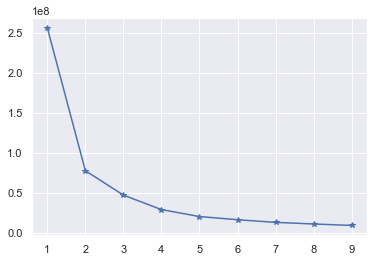

In [15]:
plt.plot(clusters_df.num_clusters,clusters_df.clusters_errors,marker='*')

In [18]:
df_z = df.apply(zscore)  # convert all attributes to Z scale 

In [19]:
KMeans= KMeans(n_clusters=2).fit(df_z)

In [20]:
centers=KMeans.cluster_centers_

In [23]:
#K means clustering in an iteration 1 till20 cluster size
cluster_range=range(1,10)
wss=[]
for i in cluster_range:
    clusters = KMeans(i)
    clusters.fit(df_z)
    wss.append(clusters.inertia_)

In [24]:
##WSS

clusters_df=pd.DataFrame({"num_clusters":cluster_range,'clusters_errors':wss})
clusters_df[0:10]

,num_clusters,clusters_errors
0,1,17070.000000
1,2,11595.461474
2,3,10061.797818
3,4,9258.977209
4,5,8555.287156
5,6,7963.765616
6,7,7538.720010
7,8,7220.192206
8,9,6860.508015


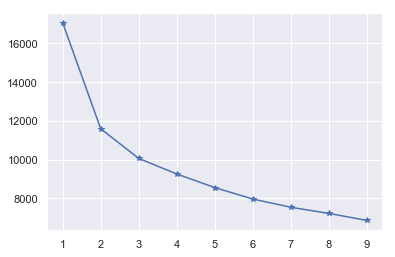

In [25]:
plt.plot(clusters_df.num_clusters,clusters_df.clusters_errors,marker='*')